In [ ]:
library(cowplot)
library(ggplot2)
library(dplyr)
library(ggrepel)
library(devtools)

In [ ]:
options(unzip = "internal")
devtools::install_github("wilkelab/cowplot")

In [4]:
# width = 6
# height = 6 * 1.2
# options(repr.plot.width=width, repr.plot.height=height)


dihedrals = 
  readr::read_csv("dihedrals.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom3 = col_character(),
  atom4 = col_character(),
  phase = col_double(),
  per = col_integer(),
  phi_x = col_double(),
  phi_y = col_double()
)


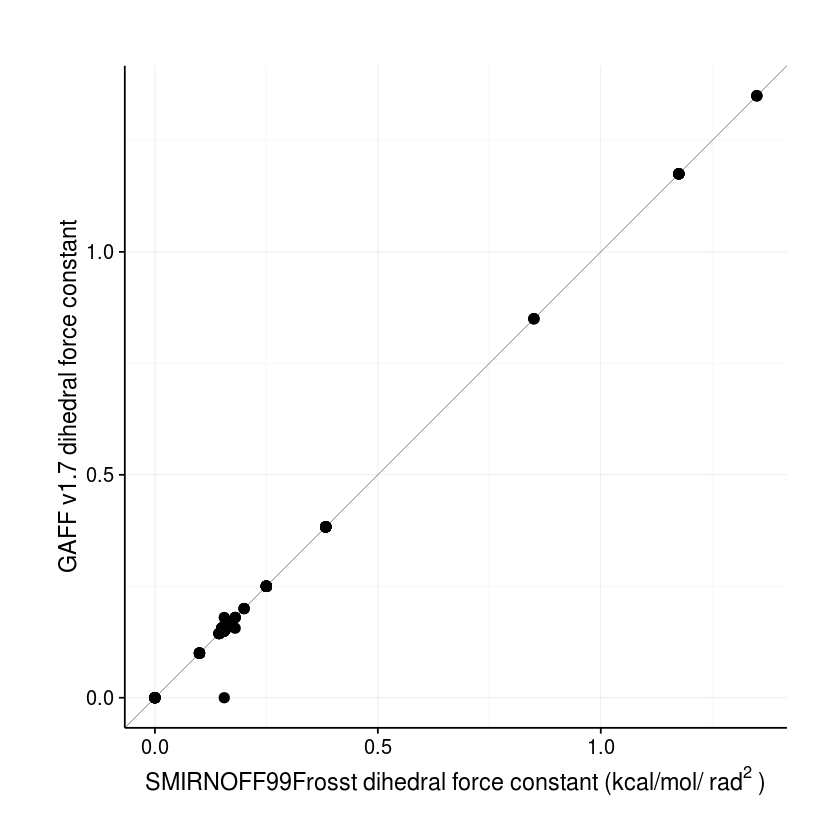

In [5]:
ggplot(dihedrals, aes(x = phi_x, y = phi_y, label = paste0(atom1, "-", atom2))) + 
geom_point(size = 2.5) +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
labs(subtitle="", 
   y="GAFF v1.7 dihedral force constant", 
   x=expression("SMIRNOFF99Frosst dihedral force constant (kcal/mol/"~rad^2~")"), 
   title="", 
   caption = "") +
background_grid(major = "xy", minor = "xy")


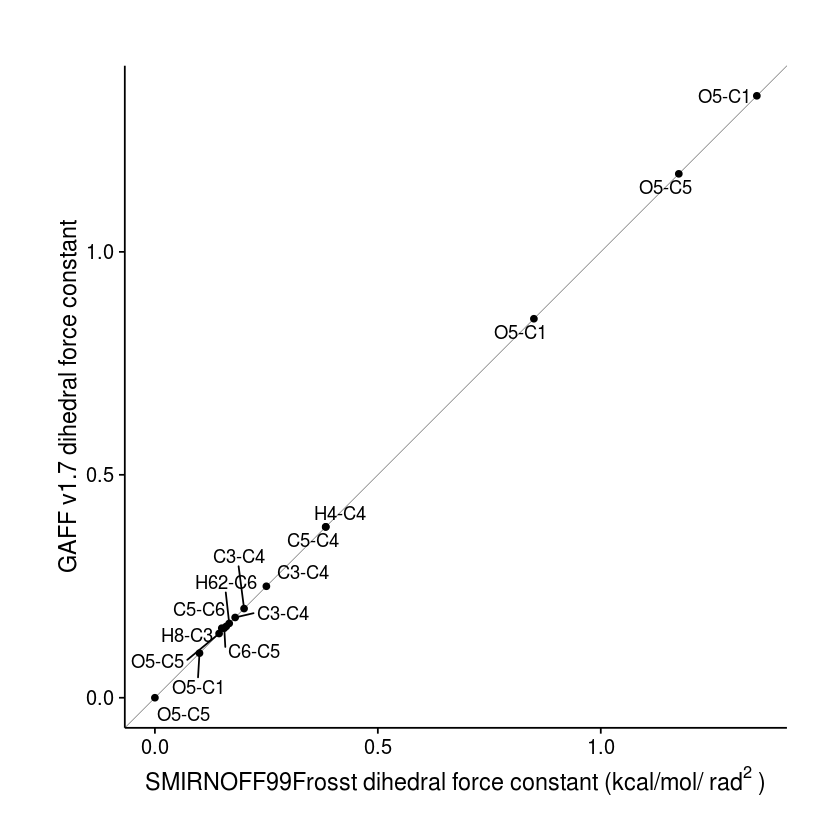

In [6]:
distinct(dihedrals, phi_x, .keep_all=TRUE) %>%
ggplot(aes(x = phi_x, y = phi_y, label = paste0(atom1, "-", atom2))) + 
geom_point() +
geom_text_repel() +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
labs(subtitle="", 
   y="GAFF v1.7 dihedral force constant", 
   x=expression("SMIRNOFF99Frosst dihedral force constant (kcal/mol/"~rad^2~")"), 
   title="", 
   caption = "")


In [7]:
dihedrals$difference = dihedrals$phi_x - dihedrals$phi_y

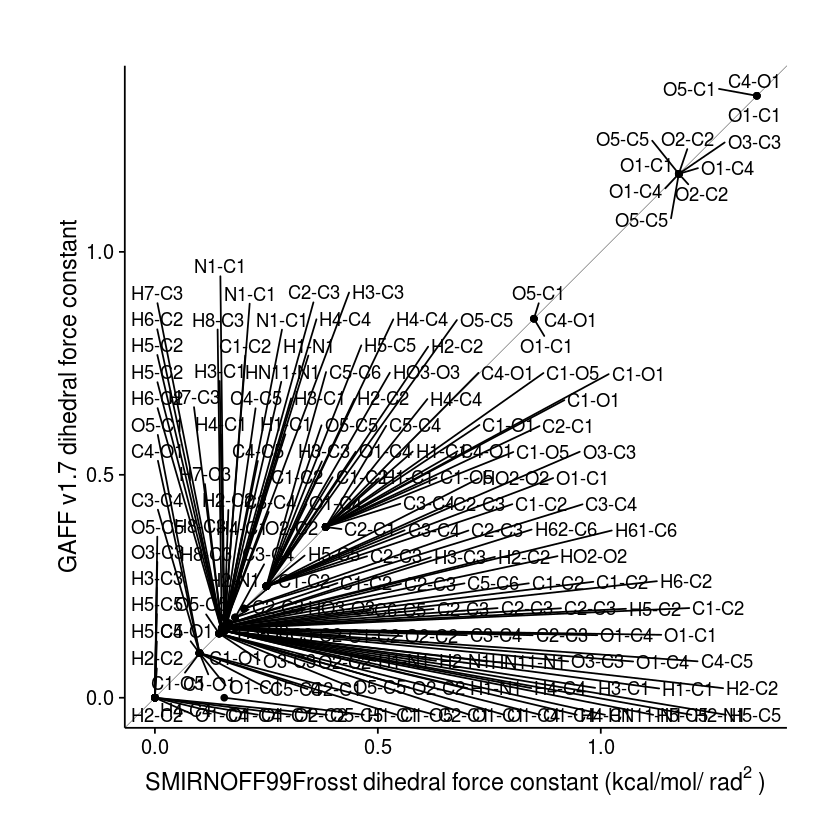

In [8]:
ggplot(dihedrals, aes(x = phi_x, y = phi_y, label = paste0(atom1, "-", atom2))) + 
geom_point() +
geom_text_repel() +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
labs(subtitle="", 
   y="GAFF v1.7 dihedral force constant", 
   x=expression("SMIRNOFF99Frosst dihedral force constant (kcal/mol/"~rad^2~")"), 
   title="", 
   caption = "")

In [9]:
dat2 <- subset(dihedrals)

In [10]:
dat2$text <- ""

In [11]:
dat2$text[abs(dihedrals$difference) > 0.01] <- paste0(dihedrals$atom1[abs(dihedrals$difference) > 0.1], "-",
                                                     dihedrals$atom2[abs(dihedrals$difference) > 0.1], "-",
                                                     dihedrals$atom3[abs(dihedrals$difference) > 0.1], "-",
                                                     dihedrals$atom4[abs(dihedrals$difference) > 0.1])

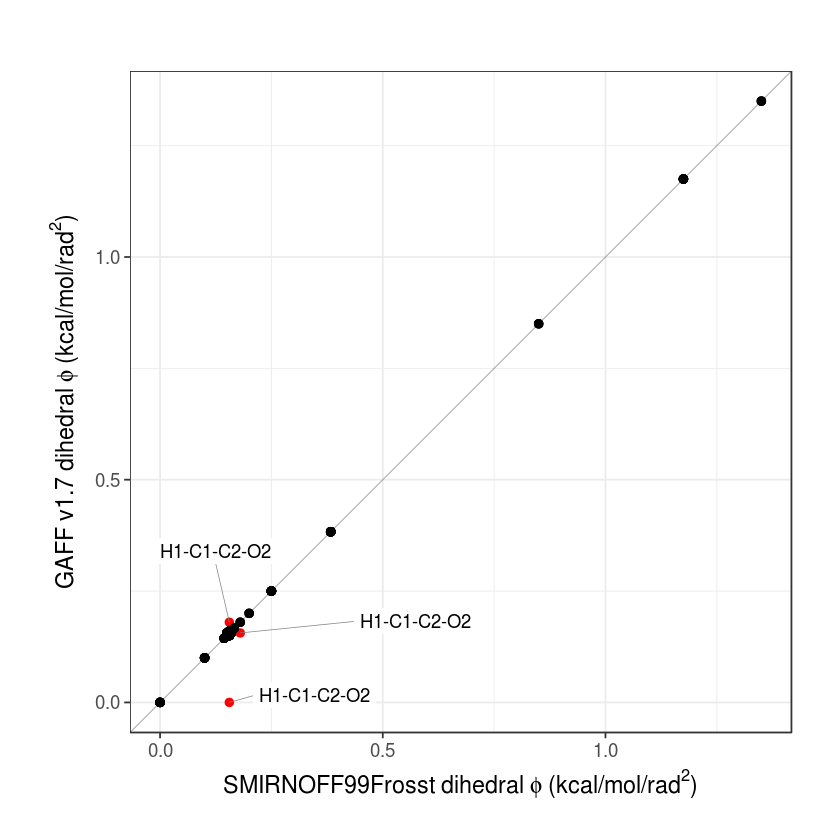

In [12]:
ggplot(dat2, aes(x = phi_x, y = phi_y, label = text)) + 
geom_point(size=2, color = ifelse(dat2$text == "", "black", "red")) +
geom_label_repel(force=2, box.padding=1, 
                 segment.color = "grey50", 
                 segment.size = 0.2, 
                 fill="white",
                label.size = NA) +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
labs(subtitle="", 
   y=expression("GAFF v1.7 dihedral "*phi*" (kcal/mol/"*rad^2*")"), 
   x=expression("SMIRNOFF99Frosst dihedral "*phi*" (kcal/mol/"*rad^2*")"),
   title="", 
   caption = "") +
theme_bw(14)

In [13]:
missing = 
  readr::read_csv("missing-dihedrals.csv")


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom3 = col_character(),
  atom4 = col_character(),
  phase = col_double(),
  per = col_integer(),
  phi_x = col_double(),
  phi_y = col_character(),
  `_merge` = col_character()
)


In [14]:
missing

X1,atom1,atom2,atom3,atom4,phase,per,phi_x,phi_y,_merge
3,O5,C1,C2,O2,0,3,0.144,NA,left_only
4,O5,C1,C2,O2,0,2,1.175,NA,left_only
5,O5,C1,C2,C3,0,3,0.156,NA,left_only
41,N1,C1,C2,C3,180,2,0.250,NA,left_only
42,N1,C1,C2,C3,180,1,0.200,NA,left_only
72,O5,C1,C2,H2,0,3,0.000,NA,left_only
73,O5,C1,C2,H2,0,1,0.250,NA,left_only
75,H1,C1,C2,O2,0,1,0.250,NA,left_only


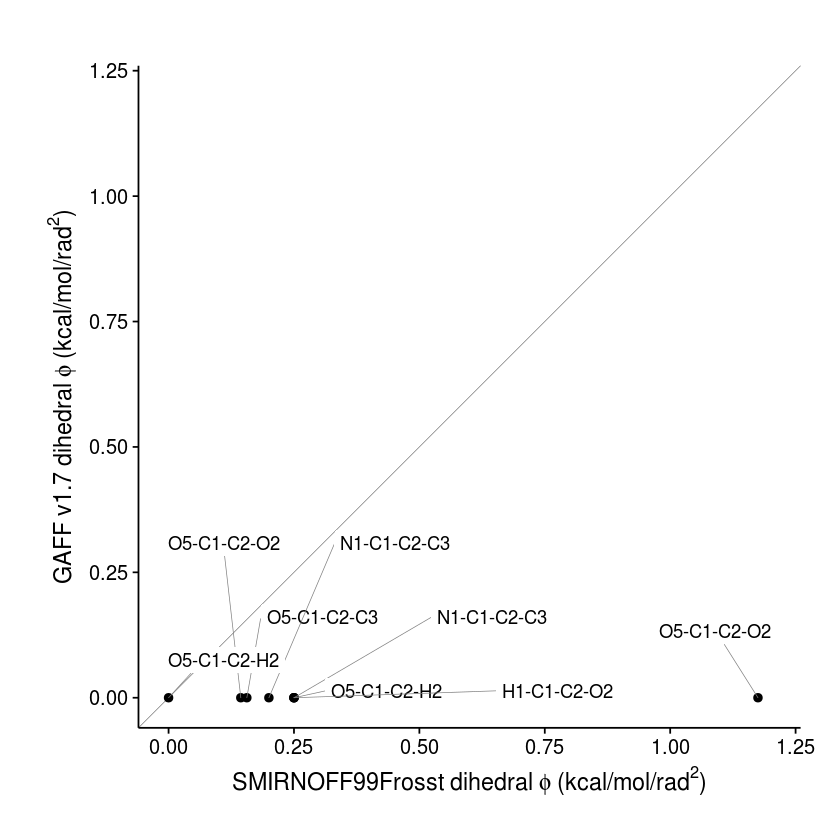

In [15]:
ggplot(missing, aes(x = phi_x, y = 0, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
geom_point(size=2) +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
xlim(0, 1.2) +
ylim(0, 1.2) +
geom_label_repel(force=2, box.padding=1, 
                 segment.color = "grey50", 
                 segment.size = 0.2, 
                 fill="white",
                label.size = NA) +
labs(subtitle="", 
   y=expression("GAFF v1.7 dihedral "*phi*" (kcal/mol/"*rad^2*")"), 
   x=expression("SMIRNOFF99Frosst dihedral "*phi*" (kcal/mol/"*rad^2*")"),
   title="", 
   caption = "")

In [18]:
theme_dviz_grid <- function(font_size = 14, font_family = "Arial", line_size = .5,
                            rel_small = 12/14, rel_tiny = 11/14, rel_large = 16/14,
                            colour = "grey90") {
  half_line <- font_size / 2
  
  cowplot::theme_cowplot(font_size = font_size, font_family = font_family, line_size = line_size,
                              rel_small = rel_small, rel_tiny = rel_tiny, rel_large = rel_large,
                              colour = colour)  %+replace%
    theme(
      plot.margin = margin(half_line/2, 0, half_line/2, 0),
      complete = TRUE
    )
}


In [8]:
ggplot(missing, aes(x = phi_x, y = 0, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
geom_point(size=2) +
geom_abline(slope = 1, size = 0.1) +
coord_equal() + 
xlim(0, 1.2) +
ylim(0, 1.2) +
geom_label_repel(force=2, box.padding=1, 
                 segment.color = "grey50", 
                 segment.size = 0.2, 
                 fill="white",
                label.size = NA) +
labs(subtitle="", 
   y=expression("GAFF v1.7 dihedral "*phi*" (kcal/mol/"*rad^2*")"), 
   x=expression("SMIRNOFF99Frosst dihedral "*phi*" (kcal/mol/"*rad^2*")"),
   title="", 
   caption = "")

Warning message in get(Info[i, 1], envir = env):
“internal error -3 in R_decompress1”

In [26]:
devtools::session_info()

Session info ------------------------------------------------------------------
Packages ----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 tz       America/Los_Angeles         
 date     2018-09-19                  

 package    * version date       source        
 assertthat   0.2.0   2017-04-11 CRAN (R 3.3.2)
 base       * 3.3.2   2017-04-27 local         
 base64enc    0.1-3   2015-07-28 CRAN (R 3.3.2)
 colorspace   1.3-2   2016-12-14 CRAN (R 3.3.2)
 cowplot    * 0.7.0   2016-10-28 CRAN (R 3.3.2)
 crayon       1.3.4   2017-09-16 CRAN (R 3.3.2)
 datasets   * 3.3.2   2017-04-27 local         
 DBI          0.8     2018-03-02 CRAN (R 3.3.2)
 devtools     1.13.6  2018-06-27 CRAN (R 3.3.2)
 digest       0.6.15  2018-01-28 CRAN (R 3.3.2)
 dplyr      * 0.5.0   2016-06-24 CRAN (R 3.3.2)
 evaluate     0.10.1  2017-06-24 CRAN (R 3.3.2)
 ggplot2    * 2.2.0   2016-11-11 CRAN (R 3.3.2)
 ggrepel    * 0